In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import rdkit
from rdkit import Chem
#import psycopg2

In [3]:
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.dpi'] = 300
#plt.rcParams["font.family"] = 'Arial'
#plt.rcParams.update({'font.size': 24})

In [3]:
#The csv imported here is the result of running 
#SELECT  smiles, enthalpy, freeenergy, scfenergy
#FROM compound
#WHERE type = 'diradical' AND status = 'finished'
#on the yuma compound db, March 15, 2022.

In [4]:
dirad_raw = pd.read_csv('./15032022_dirad_data.csv')
dirad_raw.head()
dirad_raw['parent_smiles'] = np.nan
dirad_raw['parent_enthalpy'] = np.nan
dirad_raw.head()

,smiles,enthalpy,freeenergy,scfenergy,parent_smiles,parent_enthalpy
0,O=CO[C@H]1[C@H]2[CH]C[C@@H]1C[CH]2,-460.997109,-461.041747,-461.170429,NaN,NaN
1,[CH2]C[C@@H](C)[C@H](C)[C@H]([CH2])C,-353.357479,-353.409439,-353.616216,NaN,NaN
2,[CH2][C@@H]1C[C@@H]2[CH][C@@H]2C1(C)C,-350.967983,-351.012503,-351.181077,NaN,NaN
3,C[C]1[C@H]2[CH]C[C@H](C2)C1(C)C,-390.283559,-390.329558,-390.528242,NaN,NaN
4,[CH]1CC[C@@H]2[CH][C@@H]2CC1,-311.688322,-311.729734,-311.873945,NaN,NaN


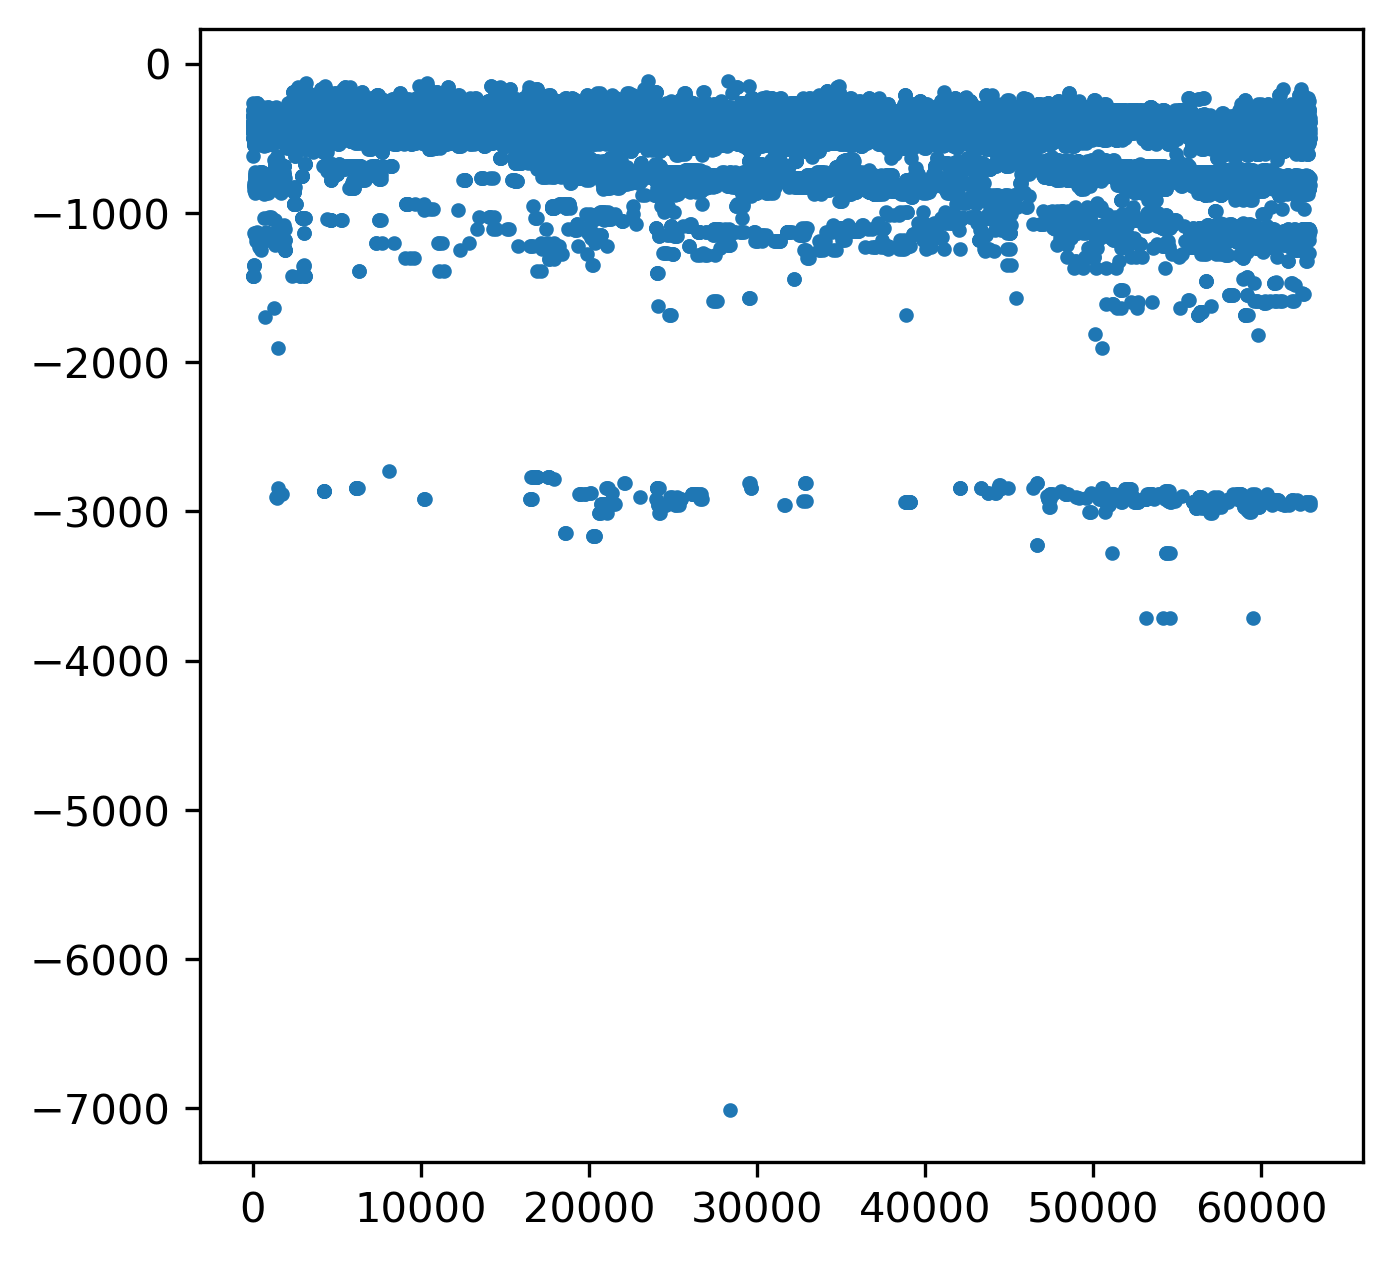

In [5]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
ax.plot(range(len(dirad_raw['smiles'])), dirad_raw['enthalpy'], '.',  ms=5, label='wB97XD-Def2TZVP')

In [6]:
#Now to get the parent BDES.
#SQL match each dirad smiles to the fragment 1 column in the reaction db
#Fragment 2 should be ''.
#Ran on an eagle node overnight.

dirad_raw.to_csv('15032022_dirads_parents.csv', index=False)

In [4]:
dirad_parent_data = pd.read_csv('BDEDbSampled.csv')
dirad_parent_data.head()

,Unnamed: 0.1,Unnamed: 0,id,smiles,type,run,status,enthalpy,mol,run_at,queued_at,logfile,error,node,freeenergy,scfenergy,stereo_assigned,stereo_unassigned,cartesian,conj_path_length
0,316,316,734776.0,Brc1ccc2c(c1)COC2,molecule,20,finished,-2958.311526,734776\n RDKit 3D\n\n 17 18 0 0...,2019-12-24 15:07:25.485272,2019-12-24 14:57:53.475622,/projects/cooptimasoot/psj_bde/log/734776_5b6b...,NaN,r3i3n23,-2958.355380,-2958.450390,NaN,NaN,0.0,0
1,677,677,834541.0,Brc1cccc2nnnn21,molecule,20,finished,-2985.372887,834541\n RDKit 3D\n\n 13 14 0 0...,2019-12-27 21:09:49.345978,2019-12-27 21:00:55.642751,/projects/cooptimasoot/psj_bde/log/834541_6b4e...,NaN,r5i2n4,-2985.413937,-2985.464000,NaN,NaN,0.0,0
2,1002,1002,633817.0,Brc1ccnn1C1CC1,molecule,20,finished,-2916.341790,633817\n RDKit 3D\n\n 16 17 0 0...,2019-12-21 10:22:23.673285,2019-12-21 10:11:49.185943,/projects/cooptimasoot/psj_bde/log/633817_98f8...,NaN,r4i1n13,-2916.385070,-2916.473847,NaN,NaN,0.0,0
3,1069,1069,845132.0,Brc1cn2ncnc2cn1,molecule,20,finished,-2985.410850,845132\n RDKit 3D\n\n 13 14 0 0...,2019-12-28 05:18:07.516263,2019-12-28 05:09:36.820280,/projects/cooptimasoot/psj_bde/log/845132_f156...,NaN,r3i2n7,-2985.451822,-2985.502650,NaN,NaN,0.0,0
4,1283,1283,685430.0,Brc1cncc(C2CC2)c1,molecule,20,finished,-2938.405777,685430\n RDKit 3D\n\n 18 19 0 0...,2019-12-23 04:37:09.325118,2019-12-23 04:26:55.352784,/projects/cooptimasoot/psj_bde/log/685430_8b93...,NaN,r4i5n2,-2938.450629,-2938.556085,NaN,NaN,0.0,0


In [5]:
unique = []
for smile in dirad_parent_data['smiles']:
    for item in (list(set(smile))):
        unique.append(item)
    unique = list(set(unique))
    
print(unique)

# Created a for loop to see unique symbols or features in each diradical from the smile string.
# The symbols will be saved into a list under the variable unique.

['P', '(', 'B', 's', 'c', '[', '-', 'i', 'O', '+', 'N', '/', '3', 'n', '1', 'F', 'H', '4', '@', '=', 'S', '#', '2', 'C', 'l', ')', 'r', '\\', ']', 'o']


In [6]:
for smile in dirad_parent_data['smiles']:
    if (('O' or 'o') and ('N' or 'n')) in smile:
        print(smile)
        
        
# This loop is distinguishing between the different capitalizations between the 'unique' features in the smiles 
# strings. If this was not ran the program would think 'O' and 'o' are different characters.

BrC1=NO[C@H]2CNC[C@@H]12
C1C2CC3CC(CC1O3)N2
C1C2CN3CC1CN(C2)C3
C1=c2ncncc2=NC1
C1CC1[C@@H]1CSCCCN1
C1CC1N[C@@H]1CCCSC1
C1CCCC2(CC1)NN2
C1CCC[C@@H]2NC[C@@H]2CC1
C1=C[C@@H]2CCC3CC[C@@H]1N32
C1=C[C@@H]2CC[C@H](C1)N2
C1C[C@@H]2N[C@@H]2CN1
C1=CCN2CC=CCC2C1
C1CCN2CCCCN2C1
C1CN1CN1CC1
C1CN2CCOC2=N1
c1csc(C2CNC2)n1
c1csc(CN2CCC2)n1
c1nnc(N2CCC2)s1
c1n[nH]c2c1CCNC2
C[C@@]12CCCN1CCNC2
C[C@@]1(C2CC2)C[C@H]1N
Cc1c2c(c(O)c3c(O)cccc13)C(=O)[C@@]1(O)C(=O)[C@H](C(N)=O)[C@](N)(O)C(=O)[C@H]1C2
CC1(C)C[C@]1(C)N
CC1(C)CC1(C#N)C#N
CC1(C)C[C@]1(N)CO
Cc1ccc2c(c1)cc(C(=O)N1CC[C@H](C(=O)N3CCCCC3)C1)n2C
Cc1ccc(Br)c(N)n1
CC1(C)CCCC(C)(C)N1
CC1(C)CCCCN1
CC1(C)CC[C@H](C#N)N1O
C=C1CC(=C)CN(C)C1
Cc1cc(C)c(N)nn1
Cc1ccc(CNN)o1
Cc1ccc(CO)c(N)c1
CC1(C)CCC(=O)NC1=O
Cc1ccc(CON)nc1
CC1(C)C[C@@H]1CN
CC1(C)C[C@H](O)CCN1
Cc1ccc(N[C@H]2CCCN(C(=O)c3cc(-c4cccn4C)n[nH]3)C2)cc1C
Cc1cc(C#N)cn1C
Cc1c(CCN)cnn1C
Cc1ccc(N=N)cc1
Cc1cc(C#N)n(C)c1C
Cc1cc(C)n(N)c(=O)c1
Cc1ccc(N=O)cc1C
Cc1ccc([N+](=O)[O-])nc1
CC1(C)CC(O)=CC(=O)N1
CC1=C[C@@H

In [7]:
oxygenated = []
nitrogens = []
halogens = []
sulphurs = []
hydrocarb = []

for ind, smile in enumerate(dirad_parent_data['smiles']):
    if ('O' or 'o') in smile:
        oxygenated.append(ind)
    elif ('N' or 'n') in smile:
        nitrogens.append(ind) 
    elif ('i' or 'I' or 'Cl' or 'cl' or 'F' or 'Br' or 'br') in smile:
        halogens.append(ind)
    elif ('S' or 's') in smile:
        sulphurs.append(ind)
    else:
        hydrocarb.append(ind)

# This loop is telling which functional groups should be binned together, we are sorting the molecules based on fg.
# A list is created for each functional group. Parameters are set to help categorize.
# elif = use when there are several conditions, it used after an if and before an else command.

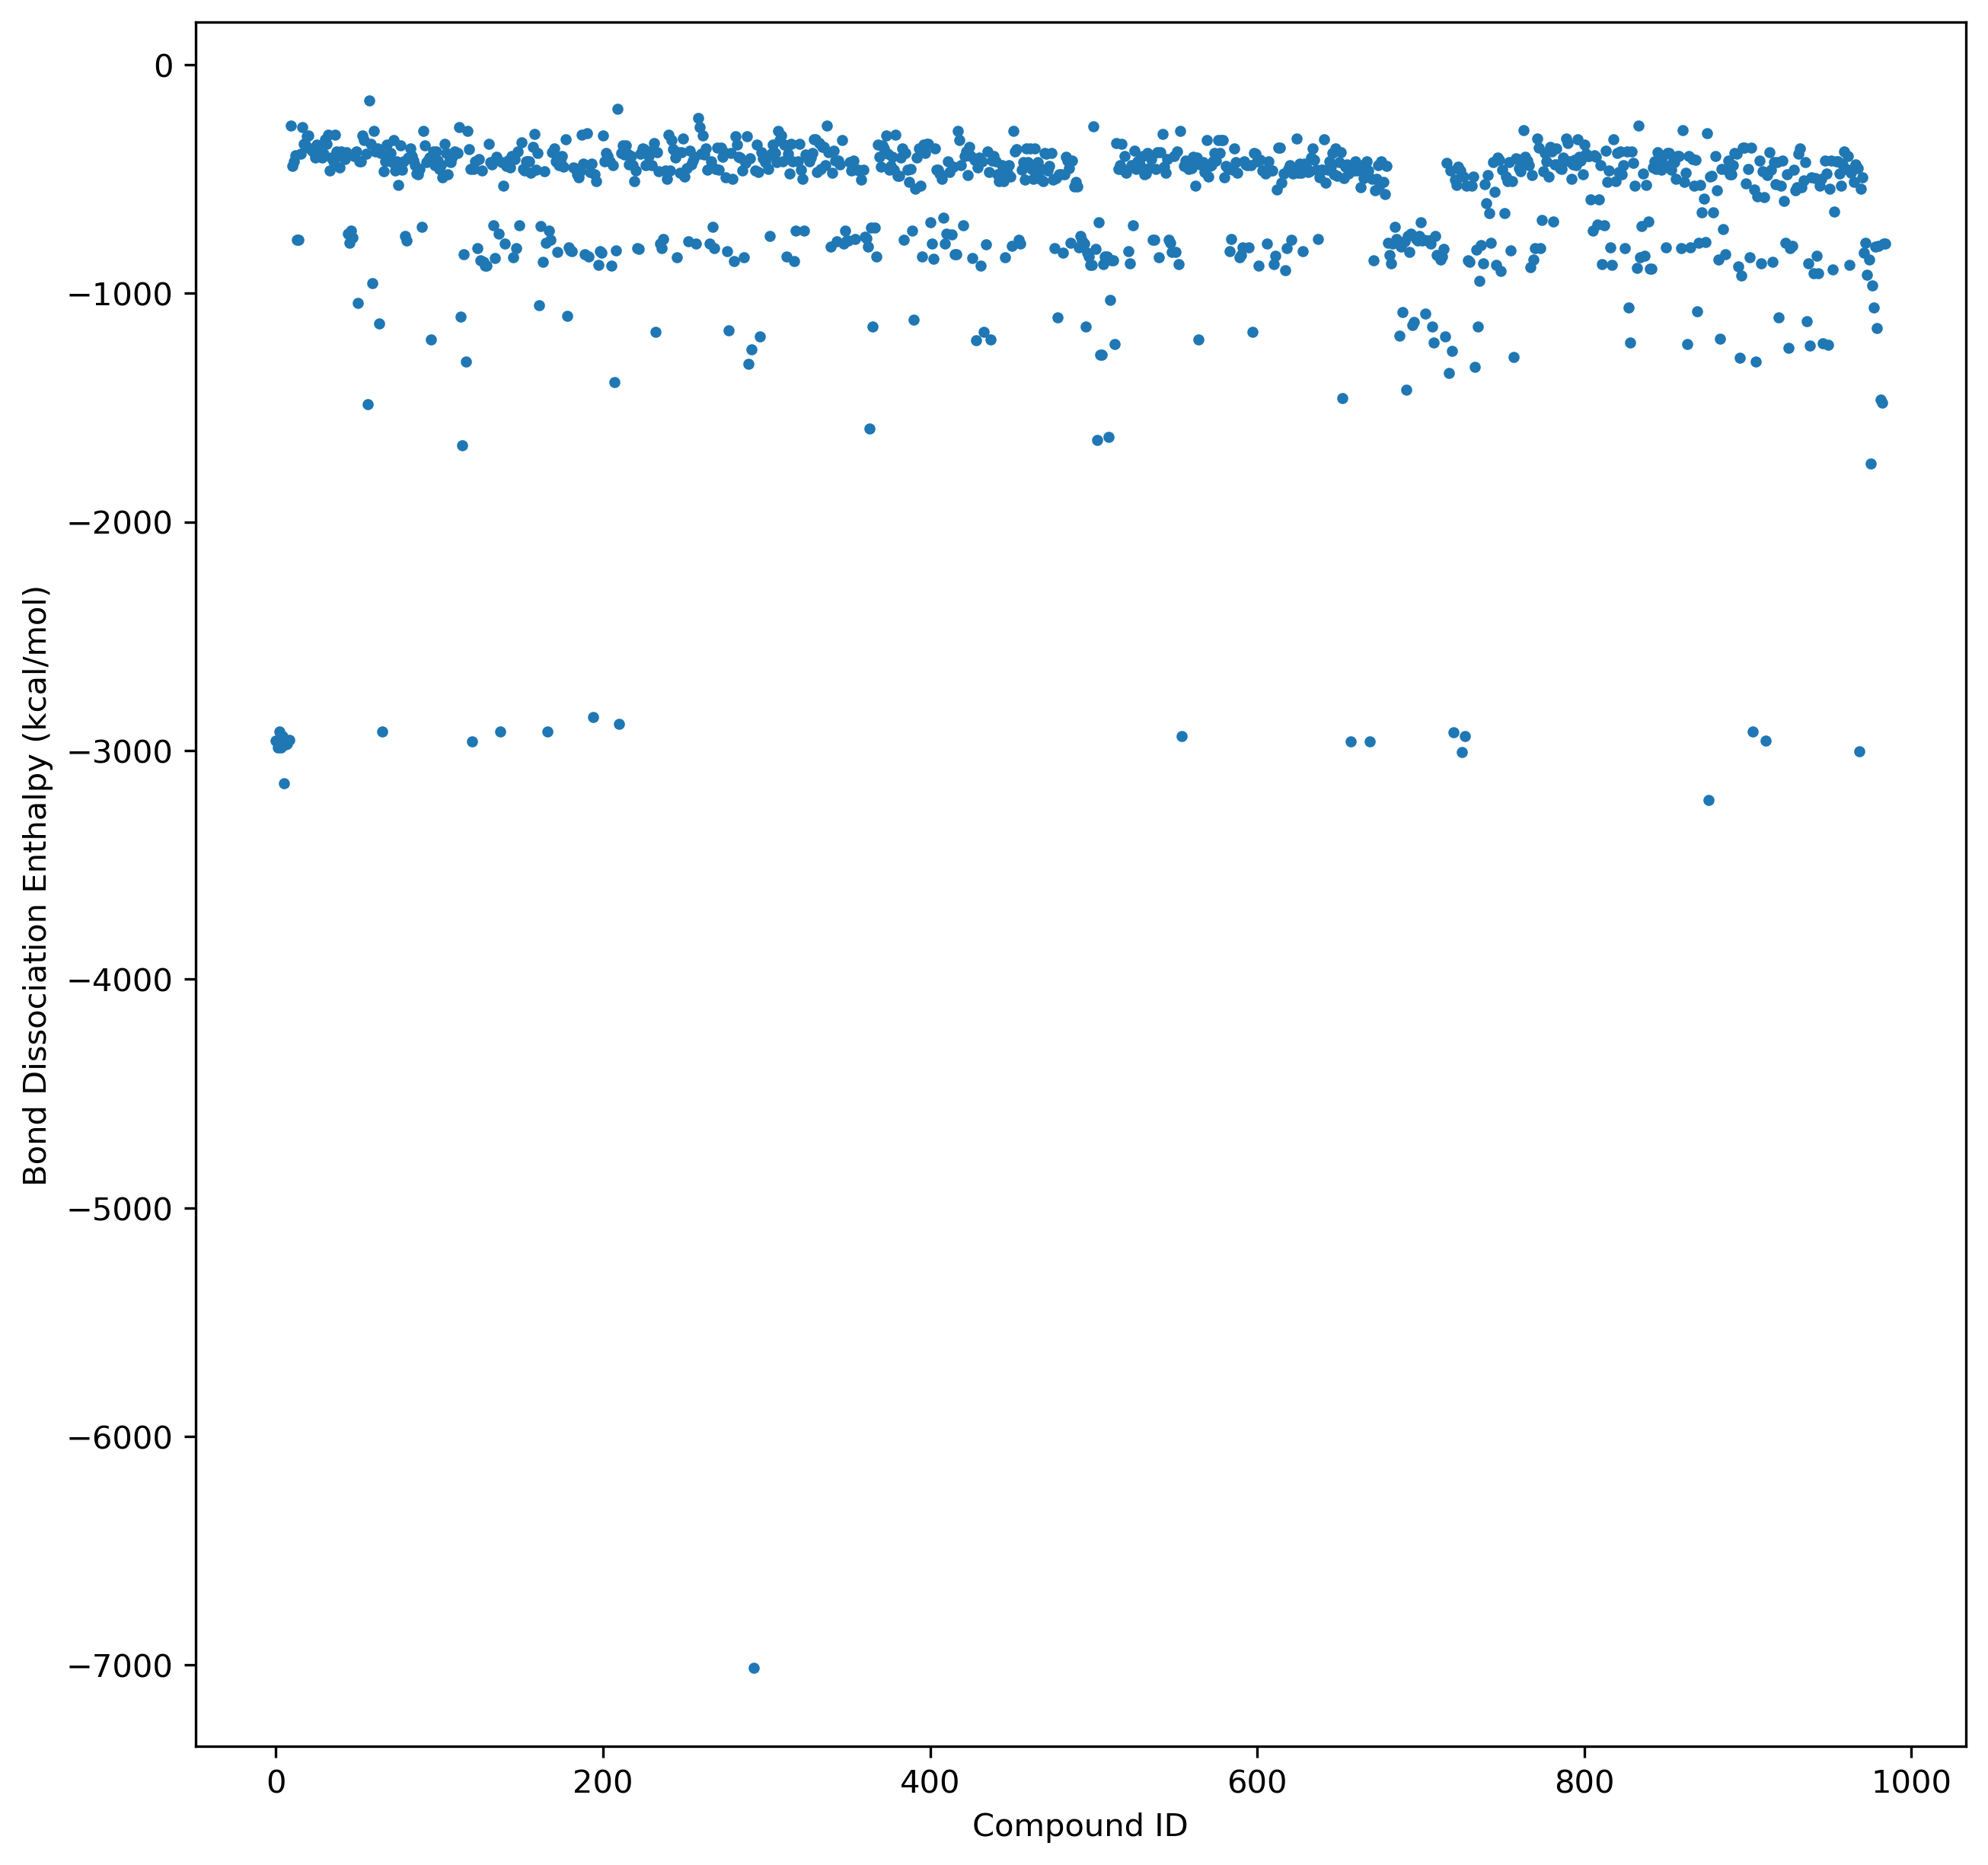

In [9]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.set_ylabel('Bond Dissociation Enthalpy (kcal/mol)')
ax.set_xlabel('Compound ID')
ax.plot(range(len(dirad_parent_data['smiles'])), dirad_parent_data['freeenergy'], '.',  ms=5, label='Bond Dissociation Enthalphy')

# Here a scatter plot was created comparing the BDE between the different molecules in the db.
# We are looking to make sure there is nothing wrong with the data, and also to see if there are outliers.

589
232
2
39
123


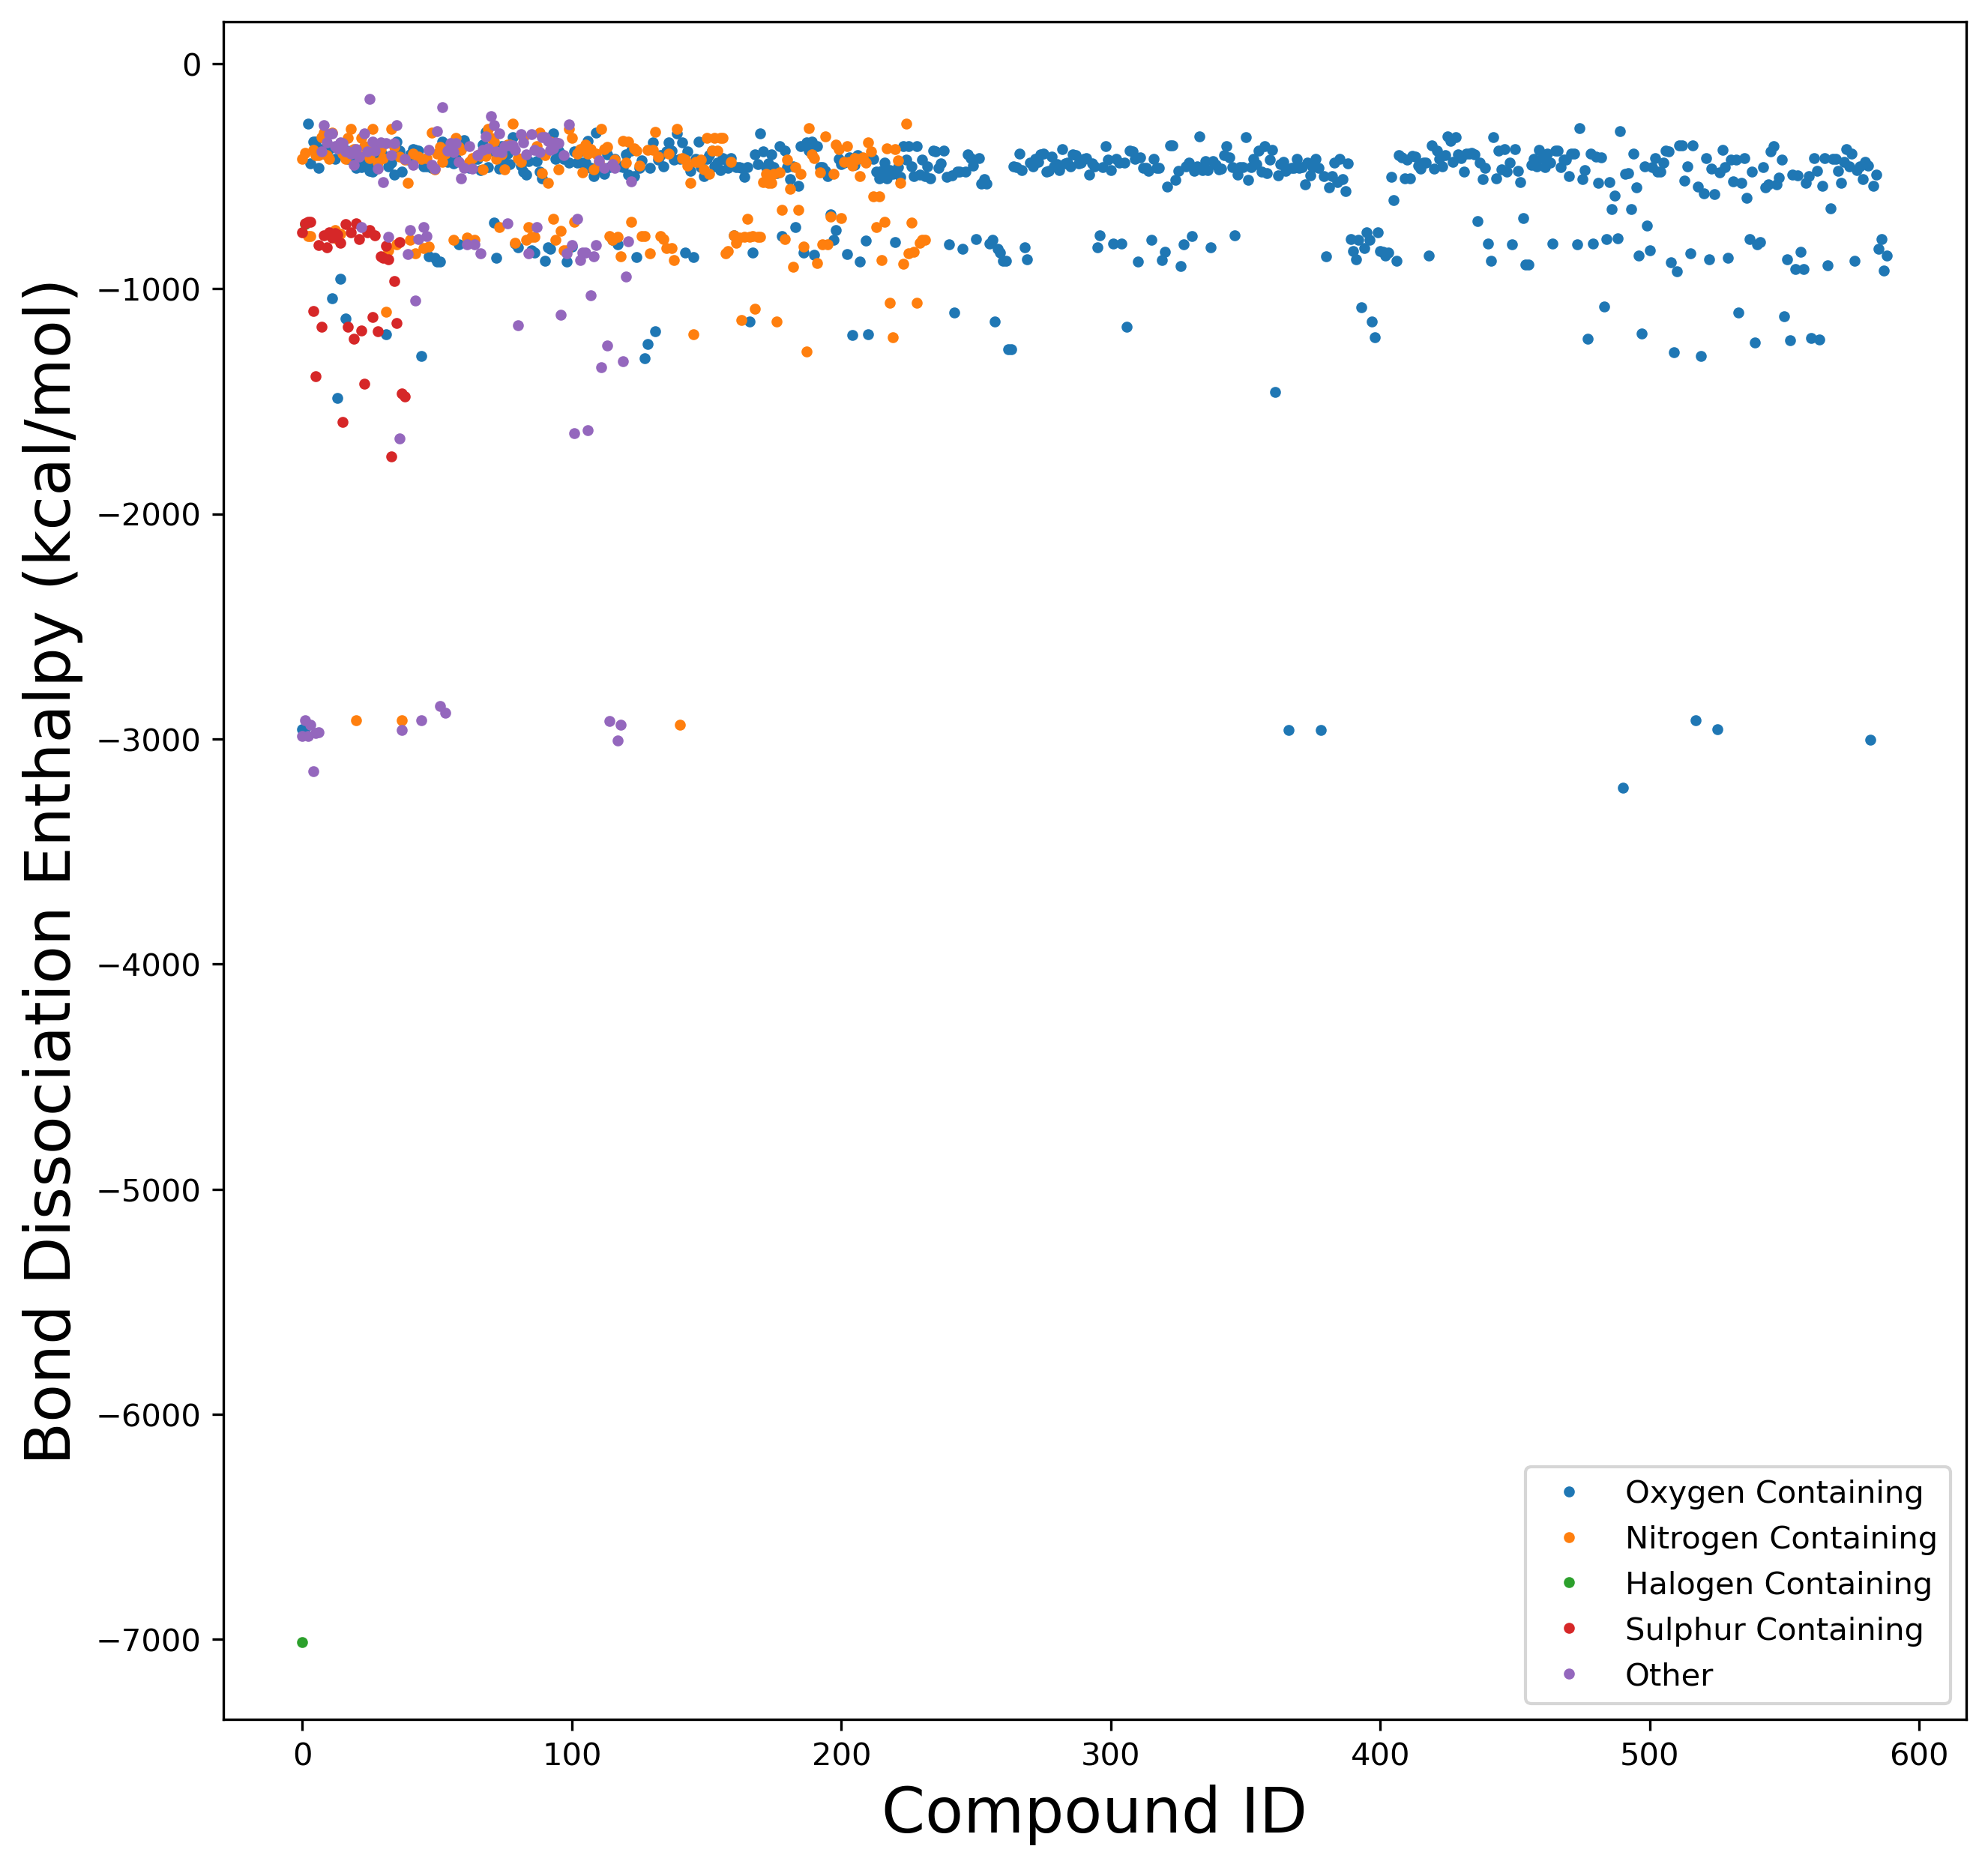

In [11]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.set_ylabel('Bond Dissociation Enthalpy (kcal/mol)', fontsize = 20)
ax.set_xlabel('Compound ID', fontsize = 20)

types = ['Oxygen Containing', 'Nitrogen Containing', 'Halogen Containing',
         'Sulphur Containing', 'Other']

for ind, cmpd_type in enumerate([oxygenated, nitrogens, halogens, sulphurs, hydrocarb]):
    cmpd_BDE = []
    for cmpd in cmpd_type:
        cmpd_BDE.append(dirad_parent_data.loc[cmpd, 'freeenergy'])
    print(len(cmpd_BDE))    
    ax.plot(range(len(cmpd_BDE)), cmpd_BDE, '.',  ms=5, label=types[ind])
    
ax.legend()
plt.savefig('BDEByCompoundHighDPI.png')

# This code allows us to set different colors for the lists of different functional groups that we created earlier.
# This way we can see the spread of the data and make sure it is accurate.

In [14]:
oxygenate_condition = (dirad_parent_data.parent_smiles.str.contains('O')) | (dirad_parent_data.parent_smiles.str.contains('o'))
nitrogen_condition = (dirad_parent_data.parent_smiles.str.contains('N') | (dirad_parent_data.parent_smiles.str.contains('n')))
halogen_condition = (dirad_parent_data.parent_smiles.str.contains('F') | dirad_parent_data.parent_smiles.str.contains('f') |
                     dirad_parent_data.parent_smiles.str.contains('Cl') | dirad_parent_data.parent_smiles.str.contains('cl') |
                     dirad_parent_data.parent_smiles.str.contains('Br') | dirad_parent_data.parent_smiles.str.contains('br') |
                     dirad_parent_data.parent_smiles.str.contains('I') | dirad_parent_data.parent_smiles.str.contains('i'))

df_hydrocarbons = dirad_parent_data[ ~oxygenate_condition & ~nitrogen_condition & ~halogen_condition]
df_oxygenates = dirad_parent_data[oxygenate_condition & ~nitrogen_condition]
df_nitrogens = dirad_parent_data[nitrogen_condition & ~ oxygenate_condition]
df_halogens = dirad_parent_data[halogen_condition]
print(len(df_hydrocarbons.smiles.unique()), len(df_oxygenates.smiles.unique()),
     len(df_nitrogens.smiles.unique()), len(df_halogens.smiles.unique()))

# Here this code allows one to see how many values are in each list and a dataframe for each was created.

3698 21065 15123 5396


In [15]:
def oxygenates_FG(smiles):
    mol = rdkit.Chem.MolFromSmiles(smiles)
    
    FG_names = ['Acyclic Ester', 'Cyclic Ester', 
                'Acyclic Ether', 'Cyclic Ether',
                'COOH', '0ry_Alcohol', '1ry_Alcohol', '2ry_Alcohol', '3ry_Alcohol', 
                'Carbonyl1', 'Carbonyl2', 'peroxide', 'phenolics']
    
    SMARTS_list = ['[CX3;!R](=[OX1])O[C,c]', '[CX3;R](=[OX1])[O;R][C,c]',
                   '[OD2;!R]([#6])[#6]', '[OD2;R]([#6;R])[#6;R]',
                   '*-C(=O)[O;D1]', '[CH3]-[O;D1]', '[CH2]-[O;D1]', '[CH1]-[O;D1]', '[CH0]-[O;D1]',
                    '*-C(=O)-[C;D1]', '*=[O;D1]', '[O]-[O]', '[c;R]-[O;D1]'
                  ]
    FG_SMARTS = [ rdkit.Chem.MolFromSmarts(x) for x in SMARTS_list  ]
    
    
    FG_count = [len(mol.GetSubstructMatches(x)) for x in FG_SMARTS]
    
    if sum(FG_count) == 0:
        if smiles == 'O' or smiles == '[C-]#[O+]':
            return 'water or carbon monoxide'
        else:
            return 'Furanics'
    else:
        FG_names_lumped = ['Acyclic Ester', 'Cyclic Ester', 
                            'Acyclic Ether', 'Cyclic Ether', 'COOH',
                            'Alcohol', 'Carbonyls', 'Peroxide', 'Phenolic']
        FG_count = FG_count[0:5] + [sum(FG_count[5:9])] + [sum(FG_count[9:11])] + FG_count[11:]
        FG_index = next((i for i, x in enumerate(FG_count) if x), None)
        
        return FG_names_lumped[FG_index]
    
# FG_names is classifying the different molecules that go into the functional group oxygenates.
# SMARTS_list is classifying the smiles structures that go into this list. For every written functional group there
# is a corresponding notation for each.
# The next set of lines is parameterizing the functional groups that fall within oxygenates, depending on whether
# or not they contain water or carbon monoxide.
# (??) Lumped =

In [16]:
result = []
for smi in df_oxygenates.smiles.unique():
    fg = oxygenates_FG(smi)
    result.append([smi,fg])
#print('.'.join([ result_smi[i] for i, fg in enumerate(result_fg) if fg == 'Carbonyls' ]))

# (??) Here are we appending the functional groups to the dataframe?

In [17]:
def hydrocarbons_FG(smiles):
    mol = rdkit.Chem.MolFromSmiles(smiles)
    
    FG_names = [  'Alkyne', 'Alkene', 'Fused-Ring Aromatics', 'Fused-Ring Cycloalkanes'  ]
    SMARTS_list = [ '[C]#[C]', '[C]=[C]', '[cR2]', '[CR2]'  ]
    
    FG_SMARTS = [ rdkit.Chem.MolFromSmarts(x) for x in SMARTS_list  ]
    FG_count = [len(mol.GetSubstructMatches(x)) for x in FG_SMARTS]
 
    FG_index = next((i for i, x in enumerate(FG_count) if x), None)

    if sum(FG_count) != 0:
        return FG_names[FG_index]
    else:
        if '1' in smiles:
            if 'c' in smiles:
                return 'Aromatics'
            else:
                return 'Cycloalkanes'
        else:
            return 'Alkane'
        
        
# The same thing is happening here as earlier, we are sorting the individual compounds within each functional groups.
# Based on certain molecules included with the compunds we are sorting them even more.

In [18]:
def nitrogens_FG(smiles):
    mol = rdkit.Chem.MolFromSmiles(smiles)
    
    FG_names = ['Amine', 'Enamine', 'Imine'
                'Nitrate']
    
    SMARTS_list = ['[NX3;H2,H1;!$(NC=O)]', '[NX3][CX3]=[CX3]',
                   '[$([CX3]([#6])[#6]),$([CX3H][#6])]=[$([NX2][#6]),$([NX2H])]', 
                   '[$([NX3](=[OX1])(=[OX1])O),$([NX3+]([OX1-])(=[OX1])O)]']
    FG_SMARTS = [ rdkit.Chem.MolFromSmarts(x) for x in SMARTS_list  ]
    
    
    FG_count = [len(mol.GetSubstructMatches(x)) for x in FG_SMARTS]
    
    FG_index = next((i for i, x in enumerate(FG_count) if x), None)
    if sum(FG_count) != 0:    
        return FG_names[FG_index]
    else:
        return 'Other'

In [19]:
def halogens_FG(smiles):
    mol = rdkit.Chem.MolFromSmiles(smiles)
    
    FG_names = ['Fluoride', 'Chloride', 'Bromide',
                'Iodide']
    
    SMARTS_list = ['[F]', '[Cl]', '[Br]', '[I]']
    FG_SMARTS = [ rdkit.Chem.MolFromSmarts(x) for x in SMARTS_list  ]
    
    
    FG_count = [len(mol.GetSubstructMatches(x)) for x in FG_SMARTS]
    
    FG_index = next((i for i, x in enumerate(FG_count) if x), None)
    
    if sum(FG_count) != 0 and FG_index != None:    
        return FG_names[FG_index]
        
    else:
        return 'Other'

In [20]:
for smi in df_hydrocarbons.smiles.unique():
    fg = hydrocarbons_FG(smi)
    result.append([smi,fg])
    
for smi in df_nitrogens.smiles.unique():
    fg = nitrogens_FG(smi)
    result.append([smi,fg])

for smi in df_halogens.smiles.unique():
    fg = halogens_FG(smi)
    result.append([smi, fg])

In [21]:
pd.DataFrame(result).to_csv('functional_groups.csv',index=False, header = ['smiles','functional_group'])

# This command allows us to add our dataframe back onto the csv with the changes made categorizing the fg's.
# Parameters were also set, including no index, and setting the headers for the variables.

In [22]:
for x in result:
    smi, fg = x
    dirad_parent_data.loc[(dirad_parent_data.smiles == smi), 'functional_group'] = fg
    
# (??) are we setting x as a variable that includes the smiles and the fg's?
# .loc allows one to access a group of values using their labels.

In [23]:
dirad_parent_data.head()

# Checking to make sure the data is correct and doesn't need to be tweaked.

,smiles,enthalpy,freeenergy,scfenergy,parent_smiles,parent_enthalpy,BDE,functional_group
0,O=CO[C@H]1[C@H]2[CH]C[C@@H]1C[CH]2,-460.997109,-461.041747,-461.170429,O=CO[C@H]1[C@H]2[C@H]3C[C@@H]1C[C@H]32,-461.103435,66.719884,Acyclic Ester
1,[CH2]C[C@@H](C)[C@H](C)[C@H]([CH2])C,-353.357479,-353.409439,-353.616216,C[C@H]1CCC[C@@H](C)[C@@H]1C,-353.498021,88.190527,Alkane
2,[CH2][C@@H]1C[C@@H]2[CH][C@@H]2C1(C)C,-350.967983,-351.012503,-351.181077,CC1(C)[C@H]2[C@H]3C[C@@H]1C[C@H]32,-351.104053,85.384333,Fused-Ring Cycloalkanes
3,C[C]1[C@H]2[CH]C[C@H](C2)C1(C)C,-390.283559,-390.329558,-390.528242,CC1(C)[C@@H]2C[C@H]3[C@@H](C2)[C@]31C,-390.386289,64.463383,Fused-Ring Cycloalkanes
4,[CH]1CC[C@@H]2[CH][C@@H]2CC1,-311.688322,-311.729734,-311.873945,C1C[C@@H]2CC[C@@H]3[C@H]1[C@H]23,-311.821898,83.819341,Fused-Ring Cycloalkanes


In [24]:
fgs = []
n_mols = []
for fg, sub_df in dirad_parent_data.groupby('functional_group'):
    #for dataset, subsub_df in sub_df.groupby('Train/Valid/Test'):
    fgs.append(fg)
    n_mols.append(len(sub_df.smiles.unique()))
    print(fg, len(sub_df.smiles.unique()), len(sub_df), sub_df.BDE.mean())
    
# Here we are checking all the fg's in the df. 
# (??) what do the values next to the fg's mean?

Acyclic Ester 1725 1725 74.61308415626401
Acyclic Ether 6284 6284 78.15213564172615
Alcohol 5497 5497 74.95626311316184
Alkane 669 669 74.93998849759403
Alkene 2258 2258 75.63284794230702
Alkyne 129 129 71.95775527933671
Amine 7200 7200 72.98385398667588
Aromatics 76 76 73.68846166875387
Bromide 448 448 74.30517806024235
COOH 1137 1137 73.9220245493398
Carbonyls 3454 3454 73.91087892313129
Chloride 728 728 71.70352745722506
Cyclic Ester 240 240 72.18234988491105
Cyclic Ether 1156 1156 74.05411606455456
Cycloalkanes 338 338 70.76502637196626
Enamine 185 185 72.59589368718935
Fluoride 4149 4149 73.7610494659167
Furanics 45 45 76.52121589228487
Fused-Ring Aromatics 10 10 65.63882180959445
Fused-Ring Cycloalkanes 218 218 64.41749199582844
ImineNitrate 405 405 75.54611751156604
Iodide 5 5 79.44577031858071
Other 4795 4795 72.38983368189538
Peroxide 184 184 70.88524207131398
Phenolic 32 32 66.56138064209219


In [25]:
bdes = []
for fg, sub_df in dirad_parent_data.groupby('functional_group'):
    bdes.append(sub_df.BDE.mean())
    
# (??) are we pulling out the bde values for the compounds?

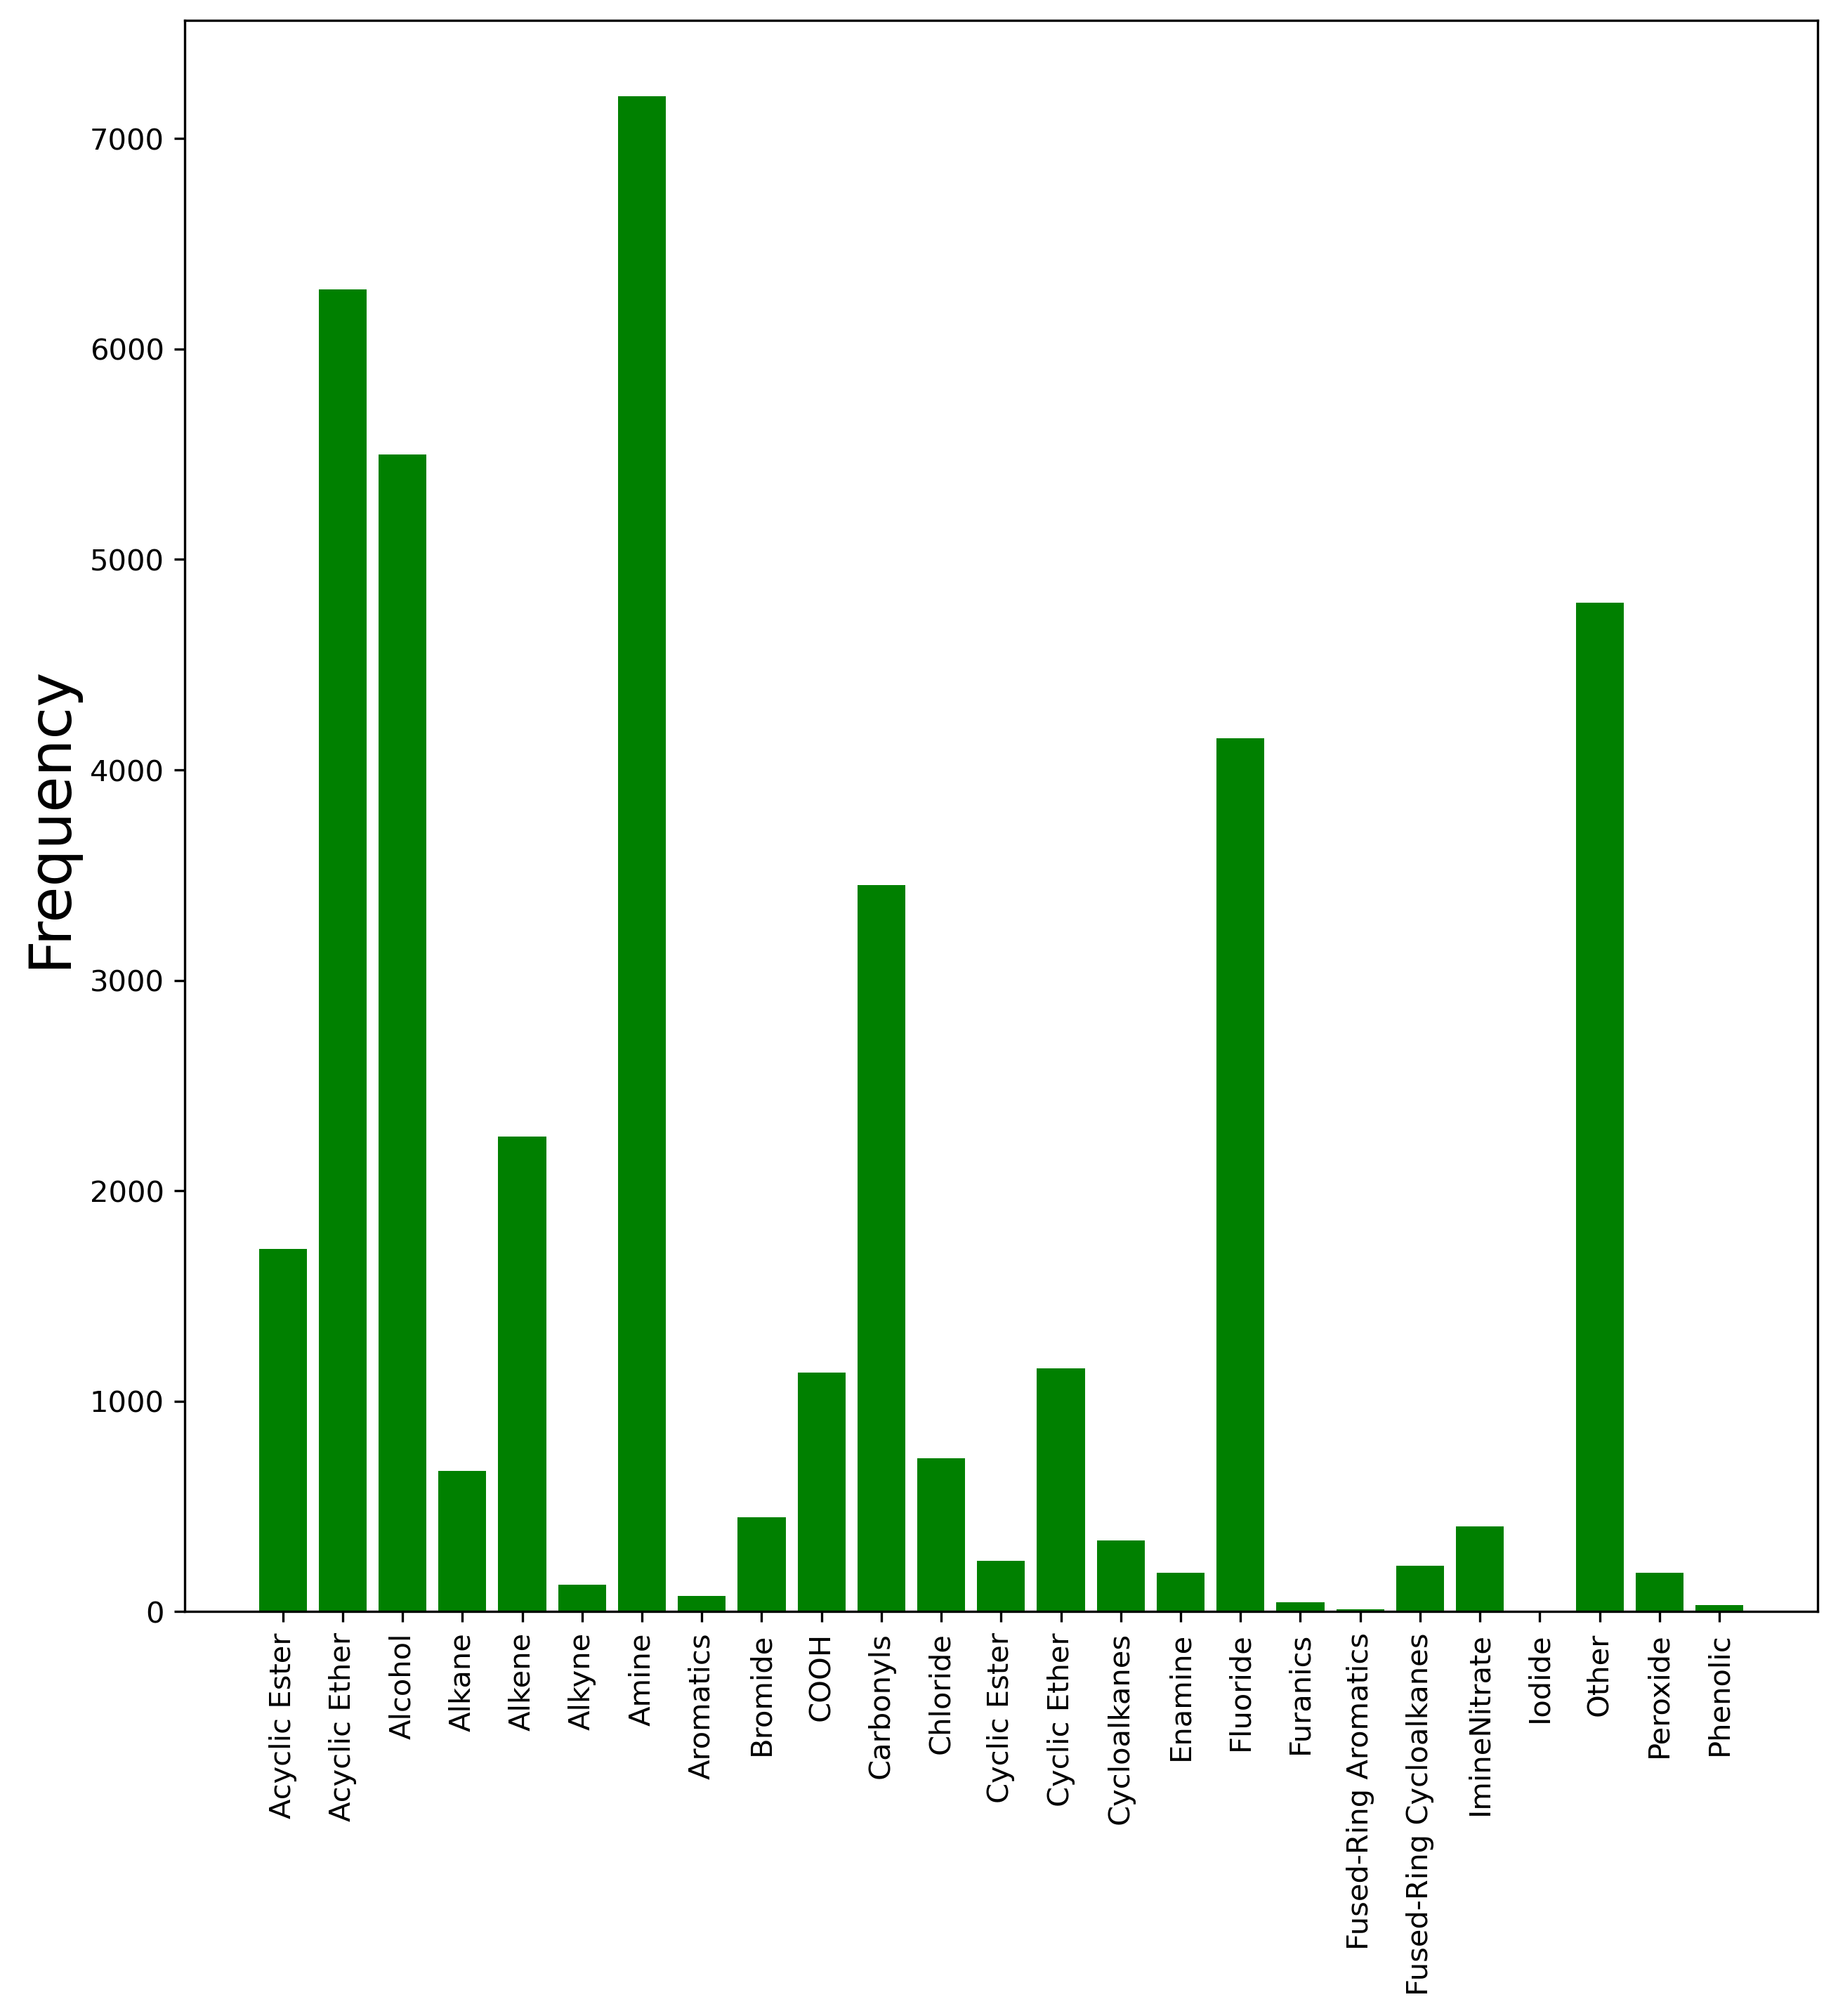

In [26]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.bar(x= range(len(fgs)), height=n_mols, color = 'green')
ax.set_xticks(range(len(fgs)))
ax.set_xticklabels(labels = fgs, rotation='vertical')
ax.set_ylabel('Frequency', fontsize = 20)
plt.savefig('FunctionalGroupDistOxyOnlyHighDPI.png')

# Looking to see the number functional groups are included in the database.
# Seeing how diverse the db is.

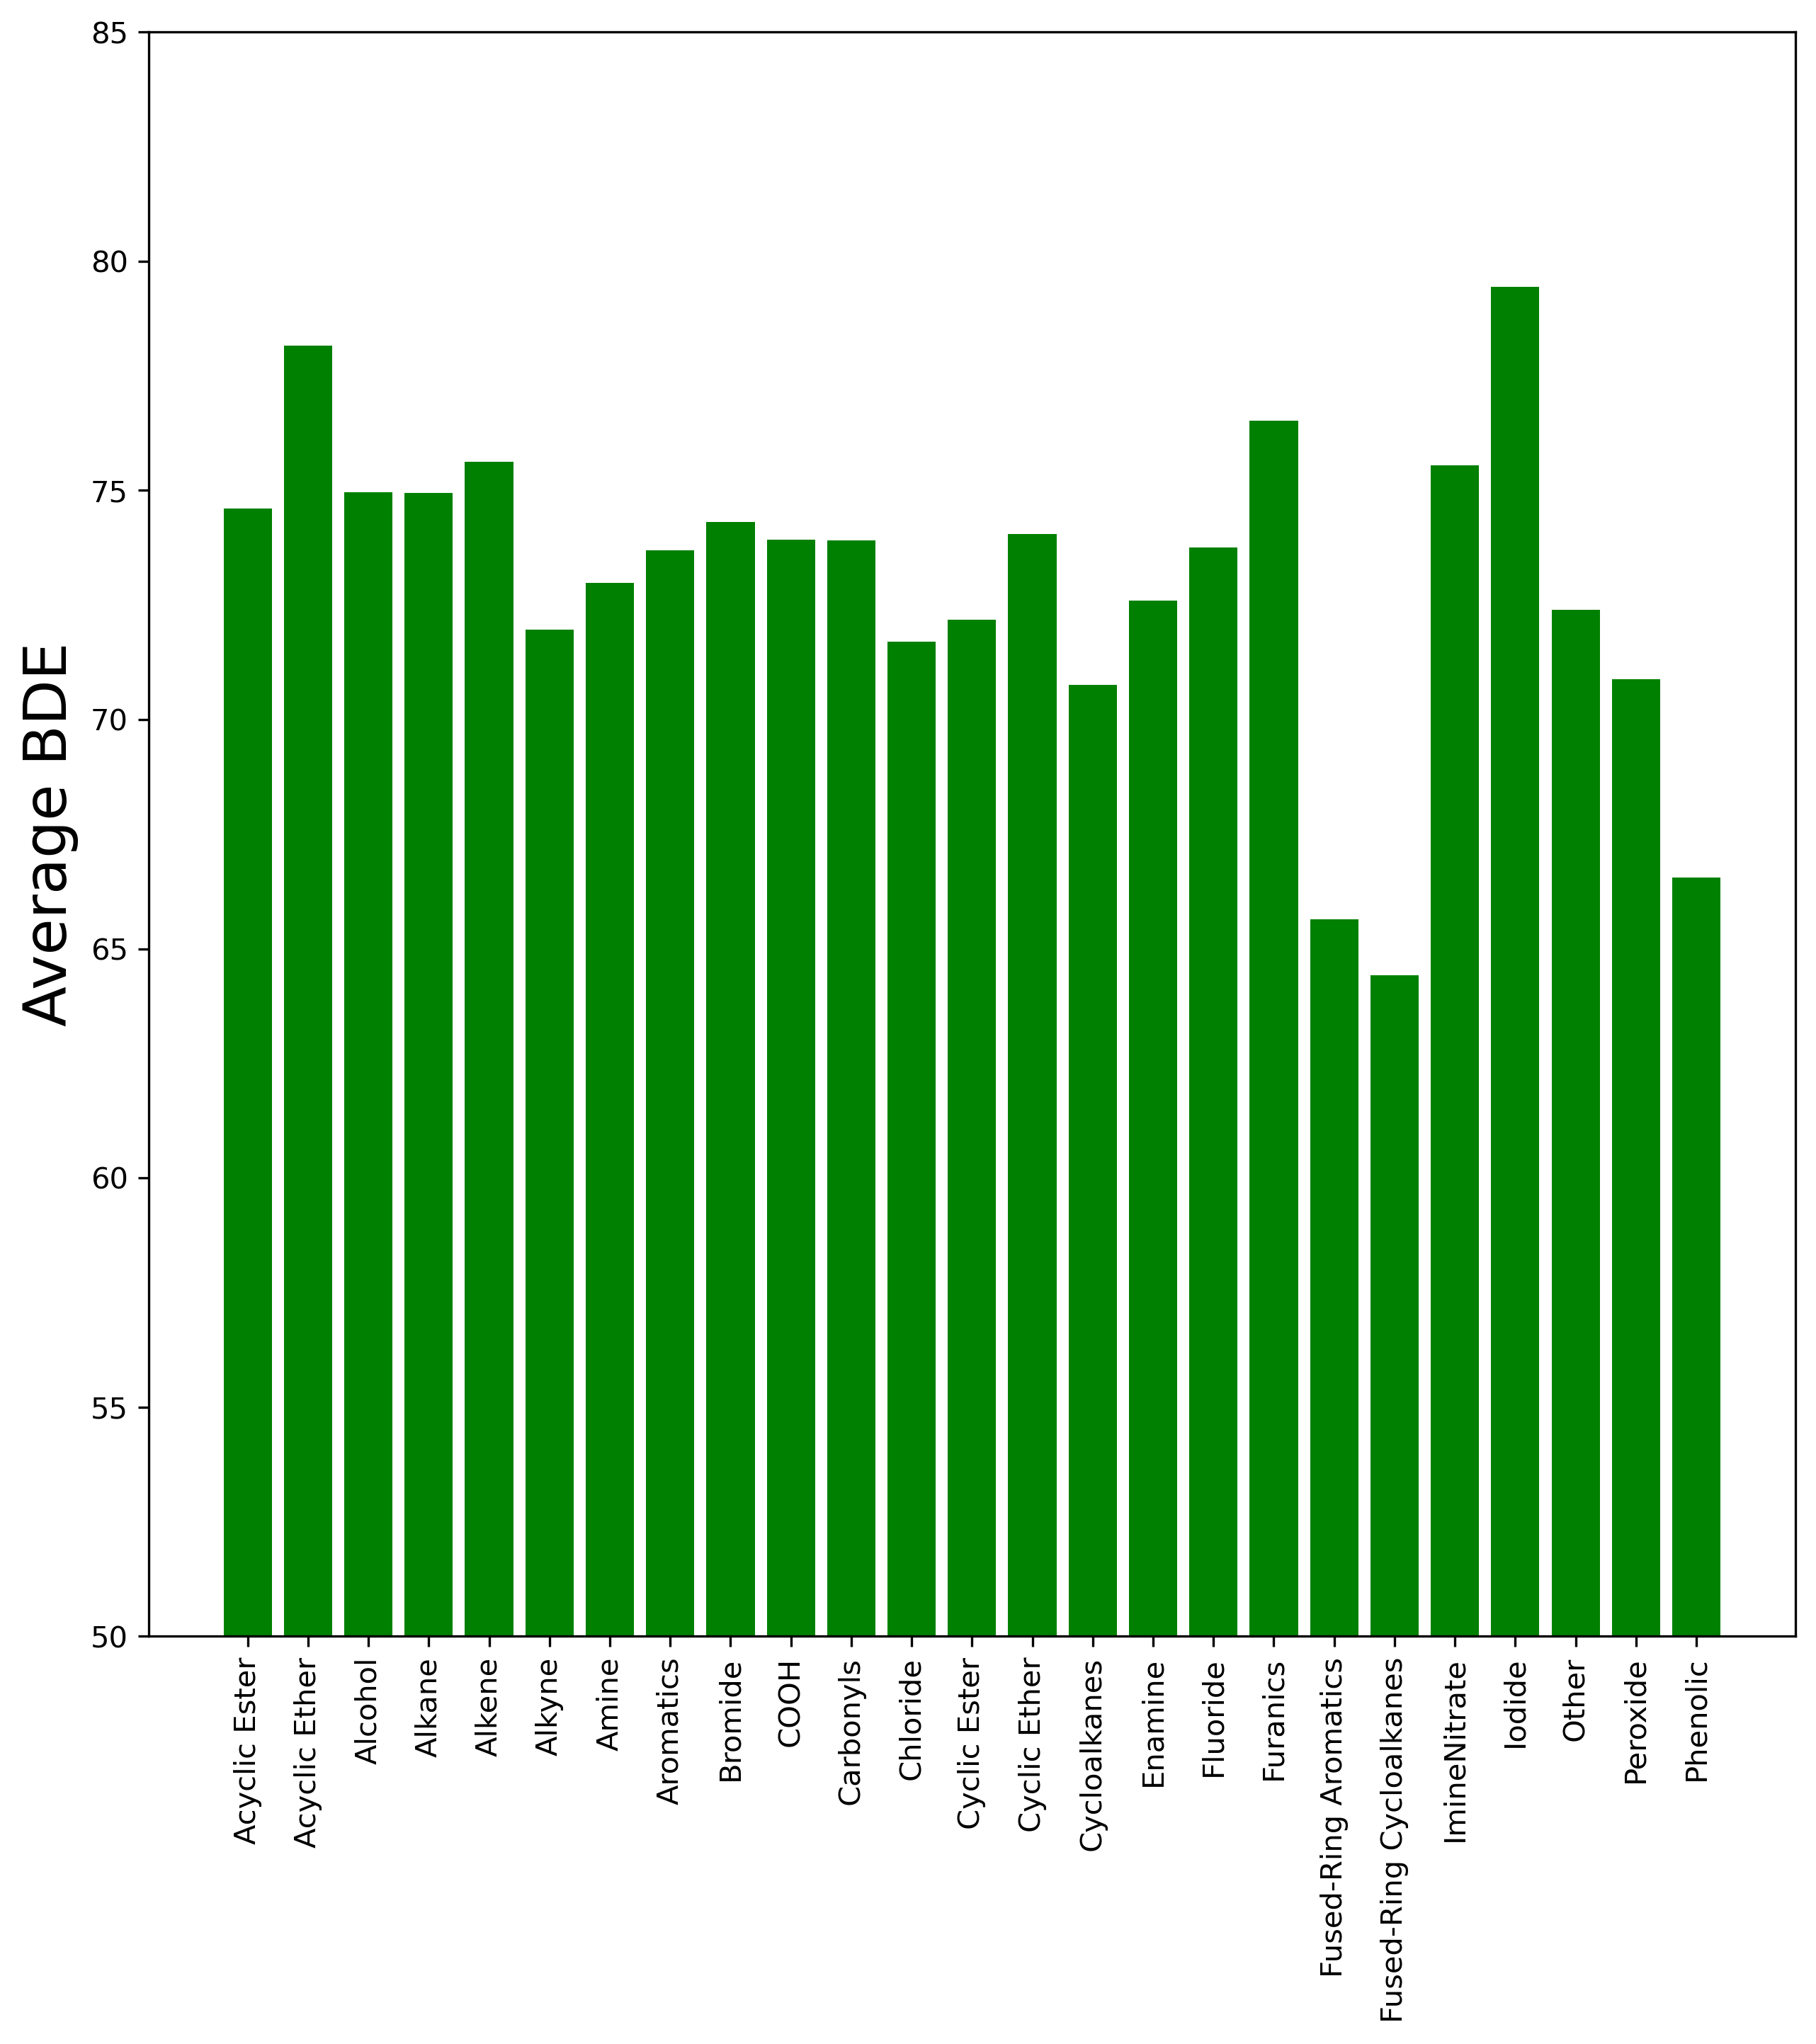

In [35]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.bar(x= range(len(fgs)), height=bdes, color = 'green')
ax.set_xticks(range(len(fgs)))
ax.set_xticklabels(labels = fgs, rotation='vertical')
ax.set_ylabel('Average BDE', fontsize = 20)
ax = plt.gca()
ax.set_ylim(ymin = 50, ymax = 85)
plt.savefig('BDEDistFunctionalGroupsHighDPI.png')

# Looking at the functional groups compared to their average BDE for that functional group.
